# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 642


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | quellon
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | ta`u
Processing Record 18 of Set 1 | holualoa
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | morehead city
Processing Record 22 of Set 1 | butem

Processing Record 42 of Set 4 | san andros
City not found. Skipping...
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | clarion
Processing Record 46 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | tahoua
Processing Record 49 of Set 4 | port mathurin
Processing Record 0 of Set 5 | verdal
Processing Record 1 of Set 5 | bikenibeu village
Processing Record 2 of Set 5 | al ghayzah
Processing Record 3 of Set 5 | ushuaia
Processing Record 4 of Set 5 | tofol
Processing Record 5 of Set 5 | haiku-pauwela
Processing Record 6 of Set 5 | vadso
Processing Record 7 of Set 5 | saudarkrokur
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5 | saint-pierre
Processing Record 10 of Set 5 | revda
Processing Record 11 of Set 5 | tobelo
Processing Record 12 of Set 5 | nema
Processing Record 13 of Set 5 | lubawa
Processing Record 14 of Set 5 | port elizab

Processing Record 34 of Set 8 | tabou
Processing Record 35 of Set 8 | yagry
City not found. Skipping...
Processing Record 36 of Set 8 | yerofey pavlovich
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | mandalgovi
Processing Record 39 of Set 8 | sarikei
Processing Record 40 of Set 8 | kataragama
City not found. Skipping...
Processing Record 41 of Set 8 | andalgala
Processing Record 42 of Set 8 | ustka
Processing Record 43 of Set 8 | konarka
Processing Record 44 of Set 8 | saint-philippe
Processing Record 45 of Set 8 | kharovsk
Processing Record 46 of Set 8 | egilsstadir
Processing Record 47 of Set 8 | benjamin hill
Processing Record 48 of Set 8 | toulepleu guere
Processing Record 49 of Set 8 | cosne-cours-sur-loire
Processing Record 0 of Set 9 | khabary
Processing Record 1 of Set 9 | nabari
Processing Record 2 of Set 9 | sambava
Processing Record 3 of Set 9 | erenhot
Processing Record 4 of Set 9 | sovetskaya gavan'
Processing Record 5 of Set 9 | sao joao del rei
Proc

Processing Record 21 of Set 12 | laojunmiao
Processing Record 22 of Set 12 | mermoz boabab
Processing Record 23 of Set 12 | belmonte
Processing Record 24 of Set 12 | nalut
Processing Record 25 of Set 12 | barakani
Processing Record 26 of Set 12 | willis
Processing Record 27 of Set 12 | port-vila
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | cooper's town
Processing Record 30 of Set 12 | amqui
Processing Record 31 of Set 12 | klaksvik
Processing Record 32 of Set 12 | chapada dos guimaraes
Processing Record 33 of Set 12 | hajjah
Processing Record 34 of Set 12 | al kharijah
Processing Record 35 of Set 12 | musan-up
Processing Record 36 of Set 12 | mbanza kongo
Processing Record 37 of Set 12 | merizo village
Processing Record 38 of Set 12 | san rafael
Processing Record 39 of Set 12 | kelso
Processing Record 40 of Set 12 | mejit
Processing Record 41 of Set 12 | xining
Processing Record 42 of Set 12 | kiffa
Processing Record 43 of Set 12 | lagoa
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          617
Lat           617
Lng           617
Max Temp      617
Humidity      617
Cloudiness    617
Wind Speed    617
Country       617
Date          617
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,16.54,79,58,1.79,PT,1701922761
1,albany,42.6001,-73.9662,-2.46,82,39,0.89,US,1701922689
2,stanley,54.8680,-1.6985,3.20,86,75,4.12,GB,1701922806
3,edinburgh of the seven seas,-37.0676,-12.3116,14.03,79,14,6.51,SH,1701922722
4,adamstown,-25.0660,-130.1015,22.70,83,66,5.96,PN,1701922708


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,16.54,79,58,1.79,PT,1701922761
1,albany,42.6001,-73.9662,-2.46,82,39,0.89,US,1701922689
2,stanley,54.8680,-1.6985,3.20,86,75,4.12,GB,1701922806
3,edinburgh of the seven seas,-37.0676,-12.3116,14.03,79,14,6.51,SH,1701922722
4,adamstown,-25.0660,-130.1015,22.70,83,66,5.96,PN,1701922708


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

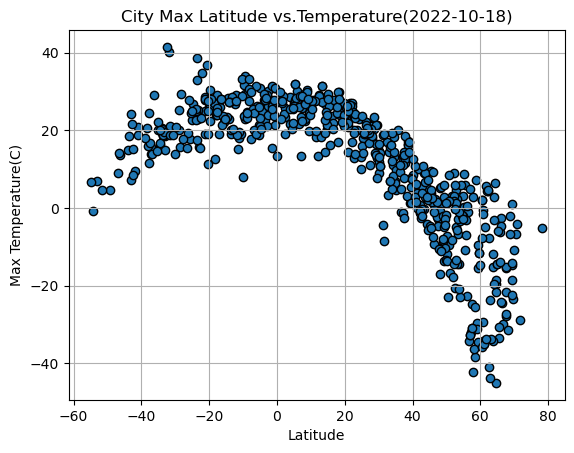

In [13]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs.Temperature(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

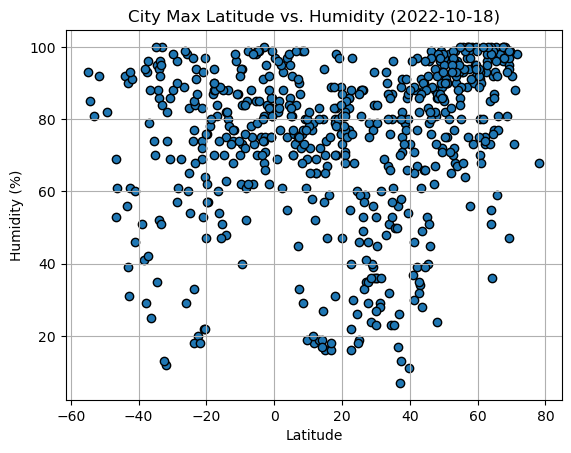

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

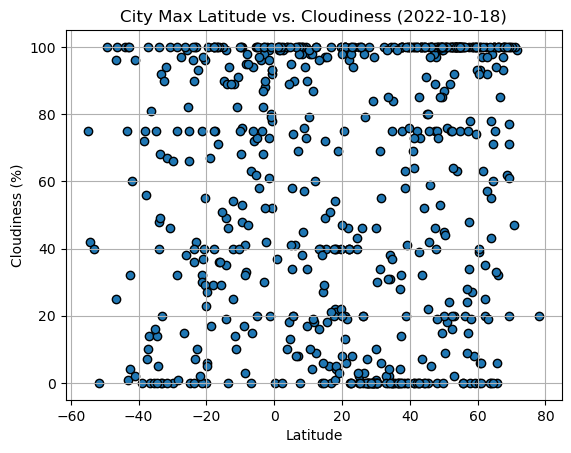

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

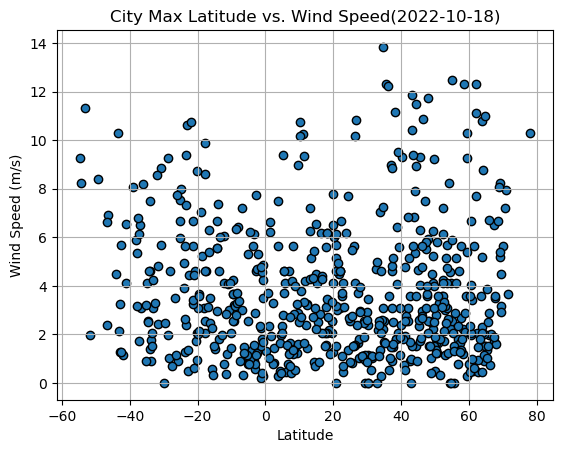

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


NameError: name 'stats' is not defined

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
cit
# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE